In [1]:
# Dependencies
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Grab CSV data
unfilteredData = pd.read_csv('Resources/WMT.csv')
unfilteredData.head()

,date,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2014-01-27,64.7650,64.9747,64.5029,64.7825,9105139,9105139,-0.235889,-0.363,64.7739,"Jan 27, 14",0.000000
1,2014-01-28,64.8786,65.8746,64.7388,65.2368,6035231,6035231,0.454305,0.701,65.3045,"Jan 28, 14",0.007013
2,2014-01-29,65.7785,65.8484,64.7126,64.7388,8440854,8440854,-0.497990,-0.763,61.0517,"Jan 29, 14",-0.000675
3,2014-01-30,65.1232,65.6037,64.9660,65.3067,6742046,6742046,0.567883,0.877,65.2975,"Jan 30, 14",0.008092
4,2014-01-31,64.5816,65.6911,64.3369,65.2455,10665285,10665285,-0.061155,-0.094,65.3223,"Jan 31, 14",0.007147


In [3]:
# Drop unneccessary input feature columns 
unfilteredData = unfilteredData.drop(columns=["volume", "unadjustedVolume", "change", "changePercent", "vwap", "label", "changeOverTime"])
unfilteredData.head()

,date,open,high,low,close
0,2014-01-27,64.7650,64.9747,64.5029,64.7825
1,2014-01-28,64.8786,65.8746,64.7388,65.2368
2,2014-01-29,65.7785,65.8484,64.7126,64.7388
3,2014-01-30,65.1232,65.6037,64.9660,65.3067
4,2014-01-31,64.5816,65.6911,64.3369,65.2455


In [4]:
#Grab All Index Values for Stock Predictor to Split CSV Data to Train and Test
unfilteredLastIndex = len(unfilteredData)-1
startDate = unfilteredData.loc[unfilteredData["date"] == "2016-06-01"]
startDateIndex = startDate.index.tolist()

In [5]:
#Filter Data down to 2 1/2 Years
filteredData = unfilteredData.loc[startDateIndex[0]:unfilteredLastIndex]
filteredData.reset_index(inplace=True, drop=True)
filteredData.head()

,date,open,high,low,close
0,2016-06-01,65.8547,66.2330,65.7706,65.8547
1,2016-06-02,65.8547,66.3217,65.5231,66.2750
2,2016-06-03,65.9201,66.3684,65.8733,66.2003
3,2016-06-06,66.8075,66.8355,66.3217,66.3684
4,2016-06-07,66.4151,66.6113,66.1816,66.3497


In [6]:
filteredLastIndex = len(filteredData)-1
spliceIndex = filteredLastIndex-1
outputStartDateIndex = startDateIndex[0] + 1
endDateTrain = filteredData.loc[filteredData["date"] == "2018-06-01"]
endDateTrainIndex = endDateTrain.index.tolist()
inputTrainEndDate = endDateTrainIndex[0] - 1
outputTestStartDate = endDateTrainIndex[0] + 1

print("Last Index of Raw Data: " + str(filteredLastIndex))
print("Splice Index: " + str(spliceIndex))
print("Input Index Train End .5 Years Ago : " + str(inputTrainEndDate))
print("Output Index Train End .5 Years Ago : " + str(endDateTrainIndex[0]))
print("Output Index Test Start .5 Years Ago : " + str(outputTestStartDate))

Last Index of Raw Data: 667
Splice Index: 666
Input Index Train End .5 Years Ago : 503
Output Index Train End .5 Years Ago : 504
Output Index Test Start .5 Years Ago : 505


In [7]:
#X Train Split using Index Values from earlier
X_trainData = filteredData.loc[:inputTrainEndDate]
X_trainData.head()

,date,open,high,low,close
0,2016-06-01,65.8547,66.2330,65.7706,65.8547
1,2016-06-02,65.8547,66.3217,65.5231,66.2750
2,2016-06-03,65.9201,66.3684,65.8733,66.2003
3,2016-06-06,66.8075,66.8355,66.3217,66.3684
4,2016-06-07,66.4151,66.6113,66.1816,66.3497


In [8]:
#Y Train Split using Index Values from earlier
y_trainData = filteredData.loc[1:endDateTrainIndex[0]]
y_trainData = y_trainData["close"]
y_trainData.head()

1    66.2750
2    66.2003
3    66.3684
4    66.3497
5    66.5833
Name: close, dtype: float64

In [9]:
#X Test Split from Index Values from earlier, with last index sliced
X_testData = filteredData.loc[endDateTrainIndex[0]:spliceIndex]
X_testData.head()

,date,open,high,low,close
504,2018-06-01,82.1124,82.4881,81.9245,82.0629
505,2018-06-04,82.5673,84.5647,82.3695,84.4658
506,2018-06-05,84.4955,84.5152,83.3089,83.6747
507,2018-06-06,84.0011,84.1961,83.4078,83.6154
508,2018-06-07,83.8330,84.8020,83.7440,84.0011


In [10]:
y_testData = unfilteredData.loc[outputTestStartDate:filteredLastIndex]
y_testData = y_testData["close"]
y_testData.head()

505    59.1116
506    61.0814
507    62.1307
508    61.5416
509    60.9985
Name: close, dtype: float64

In [11]:
movingAverageFilteredData = filteredData
movingAverageFilteredData.reset_index(inplace=True, drop=True)
movingAverageFilteredData.head()

,date,open,high,low,close
0,2016-06-01,65.8547,66.2330,65.7706,65.8547
1,2016-06-02,65.8547,66.3217,65.5231,66.2750
2,2016-06-03,65.9201,66.3684,65.8733,66.2003
3,2016-06-06,66.8075,66.8355,66.3217,66.3684
4,2016-06-07,66.4151,66.6113,66.1816,66.3497


In [12]:
# Moving Average Model
# Does Not Use X_train, y_train, x_test, or y_test dataframes
movingAverageData = pd.DataFrame(index=range(0,len(movingAverageFilteredData)),columns=['date', 'close'])
for i in range(0,len(movingAverageFilteredData)):
    movingAverageData['date'][i] = movingAverageFilteredData['date'][i]
    movingAverageData['close'][i] = movingAverageFilteredData['close'][i]
movingAverageData.head()

,date,close
0,2016-06-01,65.8547
1,2016-06-02,66.275
2,2016-06-03,66.2003
3,2016-06-06,66.3684
4,2016-06-07,66.3497


In [13]:
movingAverageTrainData = movingAverageData.loc[:inputTrainEndDate]
movingAverageTrainData.head()

,date,close
0,2016-06-01,65.8547
1,2016-06-02,66.275
2,2016-06-03,66.2003
3,2016-06-06,66.3684
4,2016-06-07,66.3497


In [14]:
movingAverageTestData = movingAverageData.loc[endDateTrainIndex[0]:]
movingAverageTestData.head()

,date,close
504,2018-06-01,82.0629
505,2018-06-04,84.4658
506,2018-06-05,83.6747
507,2018-06-06,83.6154
508,2018-06-07,84.0011


In [15]:
movingAverageData.shape, movingAverageTrainData.shape, movingAverageTestData.shape 

((668, 2), (504, 2), (164, 2))

In [16]:
movingAverageTrainData['date'].min(), movingAverageTrainData['date'].max(), movingAverageTestData['date'].min(), movingAverageTestData['date'].max()

('2016-06-01', '2018-05-31', '2018-06-01', '2019-01-25')

In [17]:
#make predictions
preds = []
for i in range(0,len(movingAverageTestData)):
    a = movingAverageTestData['close'][len(movingAverageTestData)-len(movingAverageTestData)+i:].sum() + sum(preds)
    b = a/len(movingAverageTestData)
    preds.append(b)

In [18]:
#calculate rmse
rmse=np.sqrt(np.mean(np.power((np.array(movingAverageTestData['close'])-preds),2)))
rmse

5.437535698023625

C:\Users\Shagufta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shagufta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Moving Average Model Predictor')

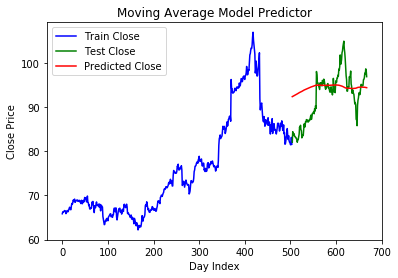

In [19]:
#plot
movingAverageTestData['Predictions'] = 0
movingAverageTestData['Predictions'] = preds
plt.plot(movingAverageTrainData['close'], 'b-', label="Train Close")
plt.plot(movingAverageTestData['close'], 'g-', label="Test Close")
plt.plot(movingAverageTestData['Predictions'], 'r-', label="Predicted Close")
plt.legend()
plt.xlabel("Day Index")
plt.ylabel("Close Price")
plt.title("Moving Average Model Predictor")

In [20]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [21]:
X_train = X_trainData
X_train = X_train.drop(columns=["date"])
X_train.head()

,open,high,low,close
0,65.8547,66.2330,65.7706,65.8547
1,65.8547,66.3217,65.5231,66.2750
2,65.9201,66.3684,65.8733,66.2003
3,66.8075,66.8355,66.3217,66.3684
4,66.4151,66.6113,66.1816,66.3497


In [22]:
X_test = X_testData
X_test = X_test.drop(columns=["date"])
X_test.head()

,open,high,low,close
504,82.1124,82.4881,81.9245,82.0629
505,82.5673,84.5647,82.3695,84.4658
506,84.4955,84.5152,83.3089,83.6747
507,84.0011,84.1961,83.4078,83.6154
508,83.8330,84.8020,83.7440,84.0011


In [23]:
#scaling data
KNN_X_train_scaled = scaler.fit_transform(X_train)
KNN_X_train = pd.DataFrame(KNN_X_train_scaled)
KNN_X_test_scaled = scaler.fit_transform(X_test)
KNN_X_test = pd.DataFrame(KNN_X_test_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[3,5,7,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(KNN_X_train,y_trainData)
preds = model.predict(KNN_X_test)

In [24]:
output = pd.DataFrame(y_testData, columns = ['close', 'predictions'], dtype=np.float64)
output = output.drop(columns=["close"])
output.reset_index(inplace=True, drop=False)
for i in range(0,len(preds)):
    output["predictions"][i] = preds[i]
output = output.set_index('index')

C:\Users\Shagufta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5,1,'K-Nearest Neighbors Model Predictor')

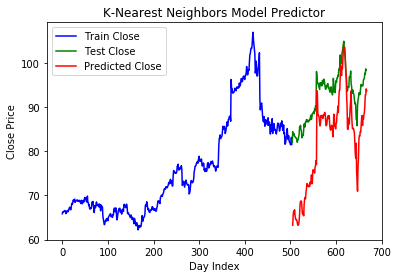

In [25]:
#plot
plt.plot(X_train['close'], 'b-', label="Train Close")
plt.plot(X_test['close'], 'g-', label="Test Close")
plt.plot(output['predictions'], 'r-', label="Predicted Close")
plt.legend()
plt.xlabel("Day Index")
plt.ylabel("Close Price")
plt.title("K-Nearest Neighbors Model Predictor")

In [26]:
#rmse
rmse=np.sqrt(np.mean(np.power((np.array(y_testData)-np.array(preds)),2)))
rmse

19.25641205441057

In [27]:
model.score(KNN_X_test, y_testData)

-41.434759064279646

In [28]:
# Auto-ARIMA model
from pyramid.arima import auto_arima

C:\Users\Shagufta\Anaconda3\envs\PythonData\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [29]:
ARIMA_train = X_trainData["close"]
ARIMA_test = X_testData["close"]

model = auto_arima(ARIMA_train, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, 
                   trace=True, error_action='ignore', supress_warnings=True)

model.fit(ARIMA_train)
# 162
ARIMA_test_periods = filteredLastIndex - endDateTrainIndex[0]
predictions = model.predict(n_periods= ARIMA_test_periods)
predictions = pd.DataFrame(predictions, index= ARIMA_test.index, columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1469.154, BIC=1490.136, Fit time=4.104 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1754.632, BIC=1763.025, Fit time=0.099 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1641.092, BIC=1657.877, Fit time=0.851 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1469.624, BIC=1486.410, Fit time=1.436 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1470.958, BIC=1496.137, Fit time=7.748 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1737.950, BIC=1754.735, Fit time=2.129 seconds


C:\Users\Shagufta\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1470.934, BIC=1496.112, Fit time=18.103 seconds


C:\Users\Shagufta\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1472.152, BIC=1501.527, Fit time=18.445 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1468.344, BIC=1493.522, Fit time=3.825 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1466.767, BIC=1487.750, Fit time=2.030 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1470.336, BIC=1499.711, Fit time=5.244 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=1468.314, BIC=1493.493, Fit time=2.706 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1740.135, BIC=1756.921, Fit time=0.253 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=1468.236, BIC=1493.414, Fit time=10.718 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=1469.138, BIC=1498.513, Fit time=10.677 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1469.805, BIC=1486.590, Fit time=1.442 seconds
Fit ARIMA: order=(3, 1, 0

In [30]:
#rmse
rmse=np.sqrt(np.mean(np.power((np.array(y_testData)-np.array(predictions)),2)))
rmse

14.844176887535719

Text(0.5,1,'Auto-ARIMA Model Predictor')

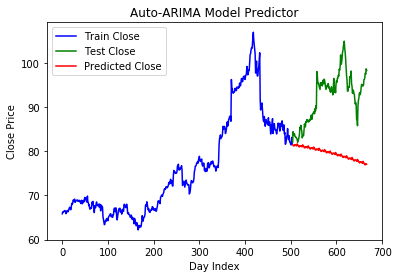

In [31]:
#plot
plt.plot(ARIMA_train, 'b-', label="Train Close")
plt.plot(ARIMA_test, 'g-', label="Test Close")
plt.plot(predictions['Prediction'], 'r-', label="Predicted Close")
plt.legend()
plt.xlabel("Day Index")
plt.ylabel("Close Price")
plt.title("Auto-ARIMA Model Predictor")

In [32]:
#Logistic Regression Model
LogReg_X_train = X_trainData[["open", "high", "low", "close"]]
LogReg_X_train.head()

,open,high,low,close
0,65.8547,66.2330,65.7706,65.8547
1,65.8547,66.3217,65.5231,66.2750
2,65.9201,66.3684,65.8733,66.2003
3,66.8075,66.8355,66.3217,66.3684
4,66.4151,66.6113,66.1816,66.3497


In [33]:
y_trainData.head()

1    66.2750
2    66.2003
3    66.3684
4    66.3497
5    66.5833
Name: close, dtype: float64

In [34]:
y_trainData1 = np.where (y_trainData.shift(-1) > y_trainData,1,-1)

In [35]:
y_trainData1

array([-1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,
        1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,
        1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
        1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,
        1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1

In [36]:
LogReg_X_test = X_testData[["open", "high", "low", "close"]]
LogReg_X_test.head()

,open,high,low,close
504,82.1124,82.4881,81.9245,82.0629
505,82.5673,84.5647,82.3695,84.4658
506,84.4955,84.5152,83.3089,83.6747
507,84.0011,84.1961,83.4078,83.6154
508,83.8330,84.8020,83.7440,84.0011


In [37]:
y_testData.head()

505    59.1116
506    61.0814
507    62.1307
508    61.5416
509    60.9985
Name: close, dtype: float64

In [38]:
y_testData1 = np.where (y_testData.shift(-1) > y_testData,1,-1)

In [39]:
y_testData1

array([ 1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
        1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,
        1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,
        1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,
        1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1, -1])

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#model = LinearRegression()
model = LogisticRegression()

In [41]:
model.fit(LogReg_X_train, y_trainData1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
predictions = model.predict(LogReg_X_test)

In [43]:
LogReg_y_test = y_testData1

In [44]:
#This would not work for logistic regression model as the values are just 1 or -1. Still kept to show it but would suggest to remove it.


output = pd.DataFrame({"Actual": y_testData1, "Prediction": predictions})
output = output.drop(columns=["Actual"])
output.reset_index(inplace=True, drop=False)
for i in range(0,len(preds)):
    output["Prediction"][i] = predictions[i]
output = output.set_index('index')

C:\Users\Shagufta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Logistic Regression Model Predictor')

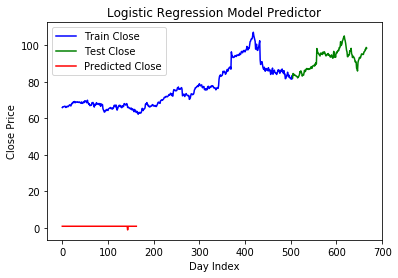

In [45]:
#plot
plt.plot(LogReg_X_train["close"], 'b-', label="Train Close")
plt.plot(LogReg_X_test["close"], 'g-', label="Test Close")
plt.plot(output, 'r-', label="Predicted Close")
plt.legend()
plt.xlabel("Day Index")
plt.ylabel("Close Price")
plt.title("Logistic Regression Model Predictor")

C:\Users\Shagufta\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Shagufta\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Shagufta\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


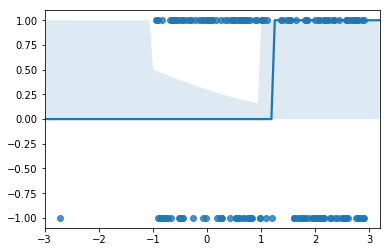

In [46]:
# Plotting the logistic regression model

import seaborn as sns

sns.regplot(x=predictions, y=LogReg_y_test, logistic=True, n_boot=500, x_jitter=2)

In [47]:
# Validate  and calculate the model accuracy on the test dataset using ‘score’ function.

print(f"Training Data Score: {model.score(LogReg_X_train, y_trainData1)}")
print(f"Testing Data Score: {model.score(LogReg_X_test, y_testData1)}")

Training Data Score: 0.5595238095238095
Testing Data Score: 0.5276073619631901


In [48]:
#Grab All Index Values for Stock Predictor to Split CSV Data to Train and Test
# THESE ARE OLD INDEX VALUES THAT WE KEPT FOR SHAGUFTA'S CODE. ALL THESE VALUES WERE USED TO SET THE X/Y Train and Test DF's.
lastIndex = len(unfilteredData)-1
spliceIndex = lastIndex-1
startDate = unfilteredData.loc[unfilteredData["date"] == "2016-06-01"]
startDateIndex = startDate.index.tolist()
outputStartDateIndex = startDateIndex[0] + 1
endDateTrain = unfilteredData.loc[unfilteredData["date"] == "2018-06-01"]
endDateTrainIndex = endDateTrain.index.tolist()
inputTrainEndDate = endDateTrainIndex[0] - 1
outputTestStartDate = endDateTrainIndex[0] + 1

print("Last Index of Raw Data: " + str(lastIndex))
print("Splice Index: " + str(spliceIndex))
print("Input Index Train Start 2.5 Years Ago : " + str(startDateIndex[0]))
print("Output Index Train Start 2.5 Years Ago : " + str(outputStartDateIndex))
print("Input Index Train End .5 Years Ago : " + str(inputTrainEndDate))
print("Output Index Train End .5 Years Ago : " + str(endDateTrainIndex[0]))
print("Output Index Test Start .5 Years Ago : " + str(outputTestStartDate))

Last Index of Raw Data: 1258
Splice Index: 1257
Input Index Train Start 2.5 Years Ago : 591
Output Index Train Start 2.5 Years Ago : 592
Input Index Train End .5 Years Ago : 1094
Output Index Train End .5 Years Ago : 1095
Output Index Test Start .5 Years Ago : 1096


In [ ]:

# Meena Deep Learning Model
NNfilteredData=unfilteredData.loc[startDateIndex[0]:lastIndex]
NNfilteredData["close"].max() - NNfilteredData["close"].min()

bins = np.histogram(NNfilteredData["close"],bins=18,range=(NNfilteredData["close"].min(),NNfilteredData["close"].max()))
bins

In [ ]:
# Create the bins in which Data will be held
# Bins are as follows:
bins = [ 62.1954,  64.6851,  67.1748,  69.6645,  72.1542,  74.6439,
         77.1336,  79.6233,  82.113 ,  84.6027,  87.0924,  89.5821,
         92.0718,  94.5615,  97.0512,  99.5409, 102.0306, 104.5203,
        107.01  ]

# Create the names for the four bins
group_names = ["62.1954-64.6850",  "64.6851-67.1747", "67.1748-69.6644",  "69.6645-72.1541",  "72.1542-74.6438",  "74.6439-77.1335",
         "77.1336-79.6232",  "79.6233-82.112",  "82.113- 84.6026",  "84.6027-87.0923","87.0924-89.5820",  "89.5821-92.0717",
         "92.0718-94.5614",  "94.5615-97.0511",  "97.0512-99.5408",  "99.5409-102.0305", "102.0306-104.5202", "104.5203-107.01"
         ]

NNfilteredData["closingRange"] = pd.cut(NNfilteredData["close"], bins, labels=group_names)
NNfilteredData.head()

In [ ]:
#setting up the split for NN data
NNfilteredData
X_trainNN=NNfilteredData.loc[startDateIndex[0]:inputTrainEndDate]
X_testNN=NNfilteredData.loc[endDateTrainIndex[0]:spliceIndex]
X_testData = filteredData.loc[endDateTrainIndex[0]:spliceIndex]
X_testData.head()

y_trainNN=NNfilteredData.loc[outputStartDateIndex:endDateTrainIndex[0]]
y_testNN=NNfilteredData.loc[outputTestStartDate:lastIndex]

In [ ]:
y_trainNN=y_trainNN["closingRange"]
y_testNN=y_testNN["closingRange"]

X_trainNN=X_trainNN.drop(columns=["date","close","closingRange"])
X_testNN=X_testNN.drop(columns=["date","close","closingRange"])

In [ ]:
#check shapes of model inputs
print(X_trainNN.shape,X_testNN.shape,y_trainNN.shape,y_testNN.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_scaler = StandardScaler().fit(X_trainNN)
X_train_scaled = X_scaler.transform(X_trainNN)
X_test_scaled = X_scaler.transform(X_testNN)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
y_trainNN = label_encoder.fit_transform(y_trainNN.astype(str))
label_encoder.fit(y_trainNN)
encoded_y_train = label_encoder.transform(y_trainNN)
y_testNN = label_encoder.fit_transform(y_testNN.astype(str))
encoded_y_test = label_encoder.transform(y_testNN.astype(str))

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=3))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=19, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(
   X_train_scaled,
   y_train_categorical,
   epochs=100,
   shuffle=True,
   verbose=2
)

In [ ]:
#model.evaluate not working/placing output in correct bins
#model.summary() to debug
#model_loss, model_accuracy = model.evaluate(
#    X_test_scaled, y_test_categorical, verbose=2)
#print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
#SVM TEST
SVMData = filteredData
SVMData.head()

In [ ]:
data = SVMData.values
data.shape

In [ ]:
target = filteredData["close"]
target_names = ["negative", "positive"]
SVM_X_train = X_trainData.drop(columns=["date"])

In [ ]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
#model.fit(SVM_X_train, y_trainData)
#predictions = model.predict(X_testData)

In [ ]:
#LSTM Models

#import some useful packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#load Walmart Stock Data
filepath = os.path.join('Resources', 'WMT.csv')
df = pd.read_csv(filepath)
df.head()

In [ ]:
#drop unnessecary columns
df.drop(['volume', 'unadjustedVolume', 'change', 'changePercent', 'vwap', 'label', 'changeOverTime'], 1, inplace = True)
df.head()

In [ ]:
#set index
df.set_index('date', inplace = True)
df.head()

In [ ]:
#plot close price
df.plot(y='close')

In [ ]:
#save data as a matrix
data = df.values
data.shape

In [ ]:
#save sequence length and time in the future
#we will start with 30 days and 5 days in the future (about 1 month and 1 week)
seq_length = 30
fut_point = 5
features = 4

In [ ]:
#get X data (30 day sequences)
X = []
#get all sequences up to (sequence length + future point) days out of last point (can then predict last point)
for index in range(len(data) - seq_length - fut_point):
    X.append(data[index: index + seq_length])
#get X as a numpy array
X = np.array(X)
X.shape

In [ ]:
#get Y data (close price for all days except first (sequence length + future point) days)
y = data[(seq_length + fut_point):, -1]
y.shape

In [ ]:
#train/test split of 0.85/0.15
train_split = 0.85
last_row = int(train_split * X.shape[0])
X_train = X[:last_row]
X_test = X[last_row:]
y_train = y[:last_row]
y_test = y[last_row:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
#instantiate scalers
X_scaler = MinMaxScaler(feature_range = (-1, 1))
y_scaler = MinMaxScaler(feature_range = (-1, 1))

In [ ]:
#reshape data so it can be fit
X_train_reshaped = np.reshape(X_train, (-1, 4))
X_test_reshaped = np.reshape(X_test, (-1, 4))
y_train_reshaped = np.reshape(y_train, (-1, 1))
y_test_reshaped = np.reshape(y_test, (-1, 1))

In [ ]:
#fit scalers
X_scaler.fit(X_train_reshaped)
y_scaler.fit(y_train_reshaped)

In [ ]:
#transform and rescale
X_train_scaled = np.reshape(X_scaler.transform(X_train_reshaped), X_train.shape)
X_test_scaled = np.reshape(X_scaler.transform(X_test_reshaped), X_test.shape)
y_train_scaled = np.reshape(y_scaler.transform(y_train_reshaped), y_train.shape[0])
y_test_scaled = np.reshape(y_scaler.transform(y_test_reshaped), y_test.shape[0])
X_train_scaled.shape

In [ ]:
#import layers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM

In [ ]:
#create an LSTM model
model = Sequential()

#add first LSTM layer and dropout layer
model.add(LSTM(256, return_sequences = True, input_shape = (seq_length, features)))
model.add(Dropout(0.2))

#add second LSTM layer and dropout layer
model.add(LSTM(256, return_sequences = False))
model.add(Dropout(0.2))

#add an reLU layer
model.add(Dense(32, activation = 'relu'))

#add a final layer
model.add(Dense(1, activation = 'linear'))

#compile model
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

In [ ]:
#fit model
model.fit(X_train_scaled, y_train_scaled, epochs = 60, batch_size = 64, validation_split = 0.15, verbose = 1)

In [ ]:
model.save('first_model.h5')

In [ ]:
model = load_model('first_model.h5')
model.summary()

In [ ]:
#score models
import math
train_score = model.evaluate(X_train_scaled, y_train_scaled, verbose = 0)
test_score = model.evaluate(X_test_scaled, y_test_scaled, verbose = 0)
train_rmse = math.sqrt(train_score[0])
test_rmse = math.sqrt(test_score[0])
print(f"Training Set- Score: {train_score[0]}, RMSE: {train_rmse}")
print(f"Test Set- Score: {test_score[0]}, RMSE: {test_rmse}")

In [ ]:
#evaluate model on training set and test set
y_train_preds_scaled = model.predict(X_train_scaled)
y_test_preds_scaled = model.predict(X_test_scaled)
y_train_preds_scaled.shape

In [ ]:
#rescale results
y_train_preds_denormed = y_scaler.inverse_transform(y_train_preds_scaled)
y_test_preds_denormed = y_scaler.inverse_transform(y_test_preds_scaled)

In [ ]:
#reshape results for plotting
y_train_preds = np.reshape(y_train_preds_denormed, y_train.shape[0])
y_test_preds = np.reshape(y_test_preds_denormed, y_test.shape[0])
y_train_preds.shape

In [ ]:
#create x arrays (just day indices)
days1 = np.arange(len(y_train))
days2 = np.arange(len(y_train), len(y_train) + len(y_test))

In [ ]:
#plot
fig, ax = plt.subplots()
ax.plot(days1, y_train, 'b', label = 'Training Set Actual')
ax.plot(days1, y_train_preds, 'r', label = 'Training Set Predictions')
ax.plot(days2, y_test, 'k', label = 'Test Set Actual')
ax.plot(days2, y_test_preds, 'g', label = 'Test Set Predictions')
ax.legend()
ax.set_title('Walmart LSTM Stock Predictions')
ax.set_xlabel('Day Index')
ax.set_ylabel('Closing Price')
plt.show()

In [ ]:
#plot test set only
fig2, ax2 = plt.subplots()
ax2.plot(days2, y_test, 'k', label = 'Test Set Actual')
ax2.plot(days2, y_test_preds, 'g', label = 'Test Set Predictions')
ax2.legend()
ax2.set_title('Walmart LSTM Test Set Predictions')
ax2.set_xlabel('Day Index')
ax2.set_ylabel('Closing Price')
plt.show()


In [ ]:
### Functions for Arbitrary Size, Number of Neurons, and Future Time Point
# We wish to create functions that allow for some more arbitrary settings.

In [ ]:
#function to create training and test data from a dataframe
def train_test_splitter(df, seq_length, fut_point, train_split):
    #save data as a matrix
    data = df.values
    
    #save number of features
    features = data.shape[1]
    
    #get X data (30 day sequences)
    X = []
    #get all sequences up to (sequence length + future point) days out of last point (can then predict last point)
    for index in range(len(data) - seq_length - fut_point):
        X.append(data[index: index + seq_length])
    #get X as a numpy array
    X = np.array(X)
    
    #get Y data (close price for all days except first (sequence length + future point) days)
    y = data[(seq_length + fut_point):, -1]
    
    #create train/test splits using chosing training split (between 0 and 1)
    last_row = int(train_split * X.shape[0])
    X_train = X[:last_row]
    X_test = X[last_row:]
    y_train = y[:last_row]
    y_test = y[last_row:]
    return X_train, X_test, y_train, y_test

In [ ]:
#test function with 180 days sequence and 80 days future point
X_train2, X_test2, y_train2, y_test2 = train_test_splitter(df, 180, 80, 0.85)

In [ ]:
#function to create scaled data and scalers
def create_scalers_and_normalize(X_train, X_test, y_train, y_test):
    #instantiate scalers
    X_scaler = MinMaxScaler(feature_range = (-1, 1))
    y_scaler = MinMaxScaler(feature_range = (-1, 1))
    
    #get number of features
    features = X_train.shape[2]
    
    #reshape data so it can be fit
    X_train_reshaped = np.reshape(X_train, (-1, features))
    X_test_reshaped = np.reshape(X_test, (-1, features))
    y_train_reshaped = np.reshape(y_train, (-1, 1))
    y_test_reshaped = np.reshape(y_test, (-1, 1))
    
    #fit scalers
    X_scaler.fit(X_train_reshaped)
    y_scaler.fit(y_train_reshaped)
    
    #transform and rescale
    X_train_scaled = np.reshape(X_scaler.transform(X_train_reshaped), X_train.shape)
    X_test_scaled = np.reshape(X_scaler.transform(X_test_reshaped), X_test.shape)
    y_train_scaled = np.reshape(y_scaler.transform(y_train_reshaped), y_train.shape[0])
    y_test_scaled = np.reshape(y_scaler.transform(y_test_reshaped), y_test.shape[0])
    
    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler

In [ ]:
X_train_scaled2, X_test_scaled2, y_train_scaled2, y_test_scaled2, X_scaler2, y_scaler2 = create_scalers_and_normalize(
    X_train2, X_test2, y_train2, y_test2)

In [ ]:
#create an LSTM model with different neuron sizes
def create_generic_LSTM_model(neurons, dropout, seq_length, features):
    #create an LSTM model
    model = Sequential()

    #add first LSTM layer and dropout layer
    model.add(LSTM(neurons[0], return_sequences = True, input_shape = (seq_length, features)))
    model.add(Dropout(0.2))

    #add second LSTM layer and dropout layer
    model.add(LSTM(neurons[1], return_sequences = False))
    model.add(Dropout(0.2))

    #add an reLU layer
    model.add(Dense(neurons[2], activation = 'relu'))

    #add a final layer
    model.add(Dense(1, activation = 'linear'))

    #compile model
    model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [ ]:
#test function
new_model = create_generic_LSTM_model([256, 256, 32], 0.2, 180, 4)

In [ ]:
#save model
new_model.save('second_model.h5')

In [ ]:
#load model
new_model = load_model('second_model.h5')

In [ ]:
#function to evaluate score and return predictions for a given model path
import math
def make_preds(model_path, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, y_scaler):
    #load model
    model = load_model(model_path)
    
    #score models
    train_score = model.evaluate(X_train_scaled, y_train_scaled, verbose = 0)
    test_score = model.evaluate(X_test_scaled, y_test_scaled, verbose = 0)
    train_rmse = math.sqrt(train_score[0])
    test_rmse = math.sqrt(test_score[0])
    print(f"Training Set- Score: {train_score[0]}, RMSE: {train_rmse}")
    print(f"Test Set- Score: {test_score[0]}, RMSE: {test_rmse}")
    
    #evaluate model on training set and test set
    y_train_preds_scaled = model.predict(X_train_scaled)
    y_test_preds_scaled = model.predict(X_test_scaled)
    
    #rescale results
    y_train_preds_denormed = y_scaler.inverse_transform(y_train_preds_scaled)
    y_test_preds_denormed = y_scaler.inverse_transform(y_test_preds_scaled)
    
    #reshape results for plotting
    y_train_preds = np.reshape(y_train_preds_denormed, len(y_train_scaled))
    y_test_preds = np.reshape(y_test_preds_denormed, len(y_test_scaled))
    
    return y_train_preds, y_test_preds, train_score, test_score

In [ ]:
#test function
y_train_preds, y_test_preds, train_score, test_score =  make_preds('first_model.h5', X_train_scaled, 
                                                                   X_test_scaled, y_train_scaled, y_test_scaled, 
                                                                   y_scaler)

In [ ]:
#function to create, compile, fit a model, and make predictions
def fit_generic_LSTM_model(df, seq_length, fut_point, train_split, neurons, dropout, epochs, batch_size, 
                           validation_split, model_path):
    
    #get train/test split
    X_train, X_test, y_train, y_test = train_test_splitter(df, seq_length, fut_point, train_split)
    
    #get number of features
    features = X_train.shape[2]
    
    #get scalers and normalized data
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler = create_scalers_and_normalize(
        X_train, X_test, y_train, y_test)
    
    #create model
    model = create_generic_LSTM_model(neurons, dropout, seq_length, features)
    
    #fit model
    model.fit(X_train_scaled, y_train_scaled, epochs = epochs, 
              batch_size = batch_size, validation_split = validation_split, verbose = 1)
    
    #save model
    model.save(model_path)
    
    #evaluate model and get predictions
    y_train_preds, y_test_preds, train_score, test_score = make_preds(model_path, 
                                                                      X_train_scaled, X_test_scaled, 
                                                                      y_train_scaled, y_test_scaled, y_scaler)
    
    #return necessary variables to create predictions
    return y_train, y_test, y_train_preds, y_test_preds, train_score, test_score

In [ ]:
#test function
seq_length = 180
fut_point = 80
train_split = 0.85
neurons = [256, 256, 32]
epochs = 60
batch_size = 64
validation_split = 0.15
dropout = 0.2
model_path = 'third_model.h5'
y_train3, y_test3, y_train_preds3, y_test_preds3, train_score3, test_score3 = fit_generic_LSTM_model(df, 
                                                                                                     seq_length, 
                                                                                                     fut_point, 
                                                                                                     train_split, 
                                                                                                     neurons, 
                                                                                                     dropout, 
                                                                                                     epochs, 
                                                                                                     batch_size,
                                                                                                     validation_split, 
                                                                                                     model_path)

In [ ]:
#function to plot results
def make_results_plot(y_train, y_test, y_train_preds, y_test_preds):
    #create x arrays (just day indices)
    days1 = np.arange(len(y_train))
    days2 = np.arange(len(y_train), len(y_train) + len(y_test))
    
    #plot
    fig, ax = plt.subplots()
    ax.plot(days1, y_train, 'b', label = 'Training Set Actual')
    ax.plot(days1, y_train_preds, 'r', label = 'Training Set Predictions')
    ax.plot(days2, y_test, 'k', label = 'Test Set Actual')
    ax.plot(days2, y_test_preds, 'g', label = 'Test Set Predictions')
    ax.legend()
    ax.set_title('Walmart Stock Predictions')
    ax.set_xlabel('Day Index')
    ax.set_ylabel('Closing Price')
    plt.show()

In [ ]:
#test function
y_train_preds3, y_test_preds3, train_score3, test_score3 = make_preds('third_model.h5', 
                                                                                         X_train_scaled2, 
                                                                                         X_test_scaled2, 
                                                                                         y_train_scaled2, 
                                                                                         y_test_scaled2, y_scaler2)
make_results_plot(y_train2, y_test2, y_train_preds3, y_test_preds3)

In [ ]:
#test function
seq_length = 20
fut_point = 1
train_split = 0.85
neurons = [256, 256, 32]
epochs = 60
batch_size = 64
validation_split = 0.15
dropout = 0.2
model_path = 'first_one_day_model.h5'
y_train5, y_test5, y_train_preds5, y_test_preds5, train_score5, test_score5 = fit_generic_LSTM_model(df, 
                                                                                                     seq_length, 
                                                                                                     fut_point, 
                                                                                                     train_split, 
                                                                                                     neurons, 
                                                                                                     dropout, 
                                                                                                     epochs, 
                                                                                                     batch_size,
                                                                                                     validation_split, 
                                                                                                     model_path)

In [ ]:
#plot
make_results_plot(y_train5, y_test5, y_train_preds5, y_test_preds5)

In [ ]:
#test function
seq_length = 20
fut_point = 20
train_split = 0.85
neurons = [256, 256, 32]
epochs = 60
batch_size = 64
validation_split = 0.15
dropout = 0.2
model_path = 'four_week_model.h5'
y_train6, y_test6, y_train_preds6, y_test_preds6, train_score6, test_score6 = fit_generic_LSTM_model(df, 
                                                                                                     seq_length, 
                                                                                                     fut_point, 
                                                                                                     train_split, 
                                                                                                     neurons, 
                                                                                                     dropout, 
                                                                                                     epochs, 
                                                                                                     batch_size,
                                                                                                     validation_split, 
                                                                                                     model_path)

In [ ]:
#plot
make_results_plot(y_train6, y_test6, y_train_preds6, y_test_preds6)

In [ ]:
#predict one day ahead with last week's data
seq_length = 5
fut_point = 1
train_split = 0.85
neurons = [256, 256, 32]
epochs = 60
batch_size = 64
validation_split = 0.15
dropout = 0.2
model_path = 'one_day_model.h5'
y_train4, y_test4, y_train_preds4, y_test_preds4, train_score4, test_score4 = fit_generic_LSTM_model(df, 
                                                                                                     seq_length, 
                                                                                                     fut_point, 
                                                                                                     train_split, 
                                                                                                     neurons, 
                                                                                                     dropout, 
                                                                                                     epochs, 
                                                                                                     batch_size,
                                                                                                     validation_split, 
                                                                                                     model_path)

In [ ]:
#plot
make_results_plot(y_train4, y_test4, y_train_preds4, y_test_preds4)

In [ ]:
#load Walmart Stock Data
filepath = os.path.join('Resources', 'WMT.csv')
new_df = pd.read_csv(filepath)

#drop unnessecary columns
new_df.drop(['unadjustedVolume', 'change', 'changePercent', 'label', 'changeOverTime'], 1, inplace = True)

#set index
new_df.set_index('date', inplace = True)
new_df.head()

In [ ]:
#model for old number of features
seq_length = 30
fut_point = 5
train_split = 0.85
neurons = [256, 256, 32]
epochs = 60
batch_size = 64
validation_split = 0.15
dropout = 0.2
model_path = 'more_features.h5'
y_train3, y_test3, y_train_preds3, y_test_preds3, train_score3, test_score3 = fit_generic_LSTM_model(df, 
                                                                                                     seq_length, 
                                                                                                     fut_point, 
                                                                                                     train_split, 
                                                                                                     neurons, 
                                                                                                     dropout, 
                                                                                                     epochs, 
                                                                                                     batch_size,
                                                                                                     validation_split, 
                                                                                                     model_path)

In [ ]:
#plot
make_results_plot(y_train3, y_test3, y_train_preds3, y_test_preds3)

In [ ]:
#model for new number of features
seq_length = 30
fut_point = 5
train_split = 0.85
neurons = [256, 256, 32]
epochs = 60
batch_size = 64
validation_split = 0.15
dropout = 0.2
model_path = 'more_features_real_long.h5'
y_train3, y_test3, y_train_preds3, y_test_preds3, train_score3, test_score3 = fit_generic_LSTM_model(new_df, 
                                                                                                     seq_length, 
                                                                                                     fut_point, 
                                                                                                     train_split, 
                                                                                                     neurons, 
                                                                                                     dropout, 
                                                                                                     epochs, 
                                                                                                     batch_size,
                                                                                                     validation_split, 
                                                                                                     model_path)

In [ ]:
#plot
make_results_plot(y_train3, y_test3, y_train_preds3, y_test_preds3)

In [ ]:
#test with 5 days sequence 1 day future point
seq_length = 5
fut_point = 1
train_split = 0.85
neurons = [256, 256, 32]
epochs = 60
batch_size = 64
validation_split = 0.15
dropout = 0.2
model_path = 'more_features_real.h5'
y_train3, y_test3, y_train_preds3, y_test_preds3, train_score3, test_score3 = fit_generic_LSTM_model(new_df, 
                                                                                                     seq_length, 
                                                                                                     fut_point, 
                                                                                                     train_split, 
                                                                                                     neurons, 
                                                                                                     dropout, 
                                                                                                     epochs, 
                                                                                                     batch_size,
                                                                                                     validation_split, 
                                                                                                     model_path)